In [3]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (8.0, 10.0)

In [30]:
dataDir='../../Data/d2s_annotations_v1.1'
dataType='D2S_training'
annFile='{}/annotations/{}.json'.format(dataDir,dataType)

In [31]:
# initialize D2S api for instance annotations
coco=COCO(annFile)

loading annotations into memory...
Done (t=0.07s)
creating index...
index created!


In [32]:
# display D2S categories and supercategories
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format(', '.join(nms)))

nms = set([cat['supercategory'] for cat in cats])
print('COCO supercategories: \n{}'.format(', '.join(nms)))

COCO categories: 
gepa_bio_und_fair_fencheltee, gepa_bio_und_fair_kraeuterteemischung, gepa_bio_und_fair_kamillentee, ethiquable_gruener_tee_ceylon, gepa_bio_und_fair_pfefferminztee, gepa_bio_und_fair_rooibostee, kilimanjaro_tea_earl_grey, koelln_muesli_fruechte, koelln_muesli_schoko, dr_oetker_vitalis_knuspermuesli_klassisch, corny_nussvoll, corny_schoko_banane, pelikan_tintenpatrone_canon, lettuce, carrot, cucumber, zucchini, apple_golden_delicious, apple_granny_smith, apple_red_boskoop, orange_single, clementine_single, avocado, banana_bundle, banana_single, kiwi, pear, franken_tafelreiniger, suntory_gokuri_lemonade, pasta_reggia_elicoidali, pasta_reggia_fusilli, pasta_reggia_spaghetti, caona_cocoa, cafe_wunderbar_espresso, gepa_italienischer_bio_espresso, douwe_egberts_professional_ground_coffee, corny_nussvoll_single, corny_schoko_banane_single, gepa_bio_caffe_crema, cocoba_cocoa, grapes_green_sugraone_seedless, corn_salad, rocket, grapes_sweet_celebration_seedless, oranges, cleme

In [40]:
# get all images containing given categories, select one at random
catIds = coco.getCatIds(catNms=['roma_vine_tomatoes']);
imgIds = coco.getImgIds(catIds=catIds );


In [41]:
imgIds

[14900,
 14901,
 14902,
 14903,
 14904,
 14905,
 14906,
 14907,
 14908,
 14909,
 14910,
 14911,
 14912,
 14913,
 14914,
 14915,
 14916,
 14917,
 14918,
 14919,
 14920,
 14921,
 14922,
 14923,
 14924,
 14925,
 14926,
 14927,
 14928,
 14929,
 15000,
 15001,
 15002,
 15003,
 15004,
 15005,
 15006,
 15007,
 15008,
 15009,
 15010,
 15011,
 15012,
 15013,
 15014,
 15015,
 15016,
 15017,
 15018,
 15019,
 15020,
 15021,
 15022,
 15023,
 15024,
 15025,
 15026,
 15027,
 15028,
 15029,
 15100,
 15101,
 15102,
 15103,
 15104,
 15105,
 15106,
 15107,
 15108,
 15109,
 15110,
 15111,
 15112,
 15113,
 15114,
 15115,
 15116,
 15117,
 15118,
 15119,
 15120,
 15121,
 15122,
 15123,
 15124,
 15125,
 15126,
 15127,
 15128,
 15129,
 14700,
 14701,
 14702,
 14703,
 14704,
 14705,
 14706,
 14707,
 14708,
 14709,
 14710,
 14711,
 14712,
 14713,
 14714,
 14715,
 14716,
 14717,
 14718,
 14719,
 14720,
 14721,
 14722,
 14723,
 14724,
 14725,
 14726,
 14727,
 14728,
 14729,
 14800,
 14801,
 14802,
 14803,
 14804,


In [49]:
imgIds = coco.getImgIds(imgIds = [14806])
img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]

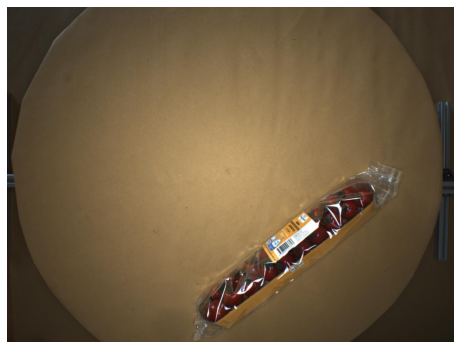

In [50]:
# load and display image
# I = io.imread('%s/images/%s/%s'%(dataDir,dataType,img['file_name']))
# use url to load image
I = io.imread('../../Data/images/%s'%(img['file_name']))
plt.axis('off')
plt.imshow(I)
plt.show()

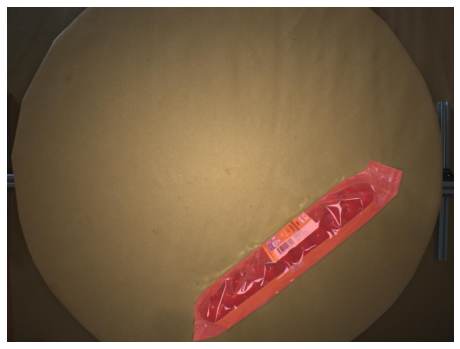

In [51]:
# load and display instance annotations
plt.imshow(I); plt.axis('off')
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)
coco.showAnns(anns)

In [45]:
anns

[{'segmentation': {'counts': 'i\\VS16^\\1<D<YL\\OfjNo0YU1CkiNi0SV1IQiNc0lV10XhN<fW1_2N3N2N2M2O2N2M3N2M2O2N2N2O001N2O1O001O1O1N2O001O1O1O0O2O1O1O001O1N2O1O001O1O1O010O1O1O001O1O100O001O1O1O00100O1O001O1O100O001O1O1O00100O1O001O1O1O10O01O1O1O00100O1O001O10O01O001O01O01O001O010O000010O01O000010O01O001O01O01O001O01O01O001O010O00001O010O00001O010O001O00010O001O01O01O001O010O00001O01O01O000010O0001O0001O01O000010O0001O00010O000010O0001O00010O00000010O0001O00010O00001O01O01O000010O0001O0001O01O000010O0001O01O01O000010O0001O00010O00000010O0001O00010O00001O01O01O000010O0001O0001O01O00010O00001O01O01O000010O0001O00010O00000010O0001O00010O00000010O00000010O00000010O000000010O000000010O000000010O000001O01O000001O01O000001O01O0000010O000000010O000001O01O000001O01O000001O01O000001O01O0001O0001O0001O0001O0001O01O000001O01O0001O0001O0001O0001O0001O0001O0001O0001O0001O0001O01O0001O0001O0001O0001O0001O0001O0001O01O000001O01O000001O01O000001O01O0000010O000001O01O000001O01O000001O01O000001O01O0000010O0000